히스토 그램은 관측값을 범주화 하고 계수하여 데이터를 생성한 기본 확률밀도 함수를 근사화하는 것을 목표로 합니다.
KDE는 동일한 문제에 대한 다른 솔루션 제공 ,이산 빈을 사용하는 대신 KDE 플롯은 가우시안 커널로 관찰을 평활화 하여 연속 밀도 추정치를 생성합니다.

In [6]:
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


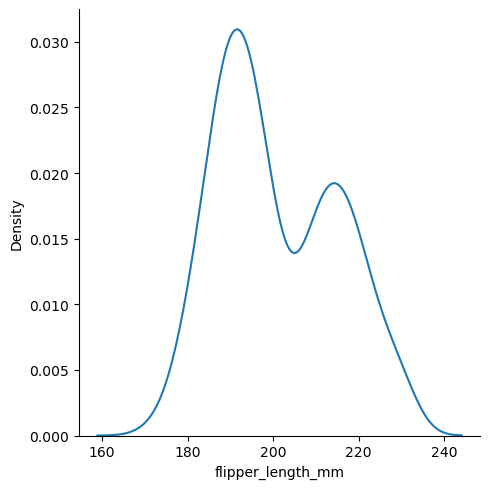

In [7]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

# Choosing the smoothing bandwidth

추정치의 견고성을 확인하는 방법은 기본 대역폭을 조정하는 것입니다.

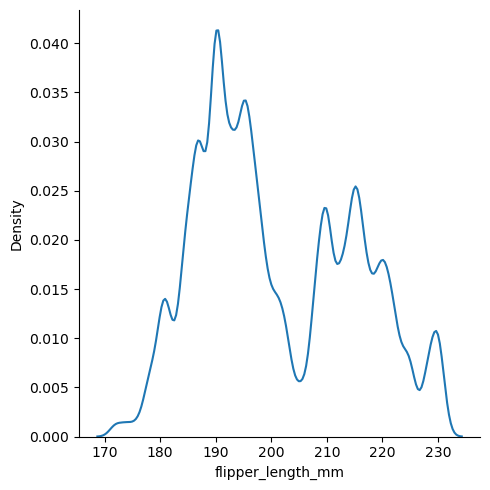

In [8]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

좁은 대역폭이 바이모달을 훨씬 더 분명하게 만들지 만 곡선이 훨씬 덜 부드럽다는 점에 유의하십시오. 대조적으로 더 큰 대역폭은 바이모달을 거의 완전히 가립니다.

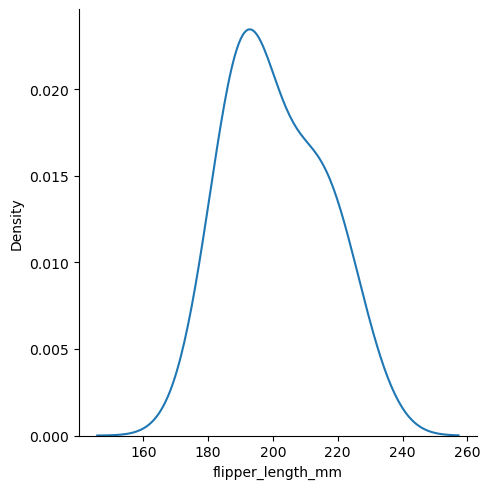

In [9]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

# Conditioning on other variables

히스토그램과 마찬가지로 변수를 할당하면 hue해당 변수의 각 수준에 대해 별도의 밀도 추정치가 계산됩니다.

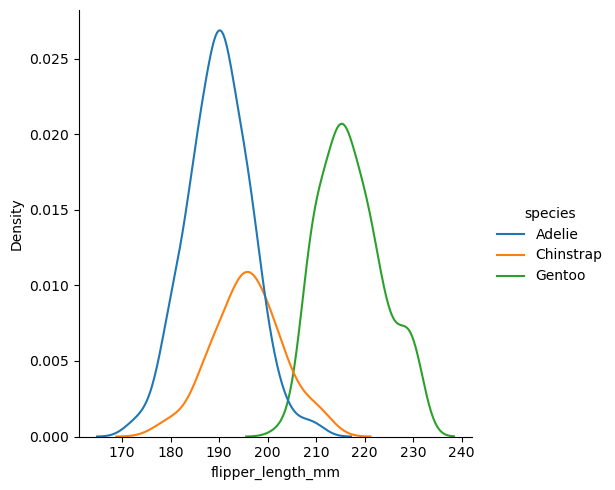

In [10]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

많은 경우 계층화된 KDE가 계층화된 히스토그램보다 해석하기 쉽기 때문에 종종 비교 작업에 적합합니다. 여러 배포판을 해결하기 위한 많은 동일한 옵션이 KDE에도 적용되지만 다음과 같습니다.

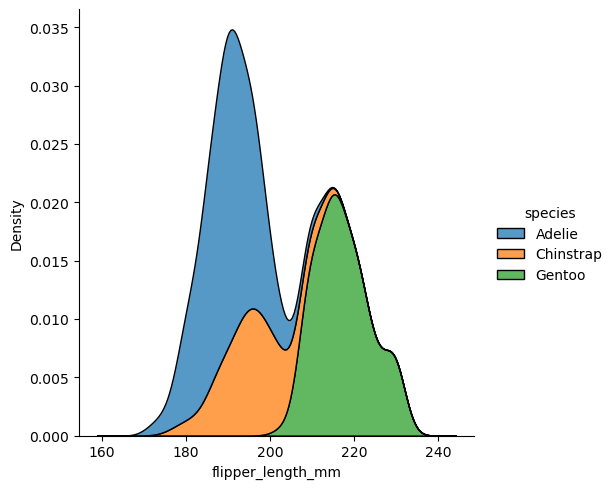

In [11]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

누적 플롯이 기본적으로 각 곡선 사이의 영역을 채우는 방법에 유의하십시오. 기본 알파 값(불투명도)이 다르지만 단일 밀도 또는 레이어 밀도에 대한 곡선을 채울 수도 있으므로 개별 밀도를 더 쉽게 확인할 수 있습니다.



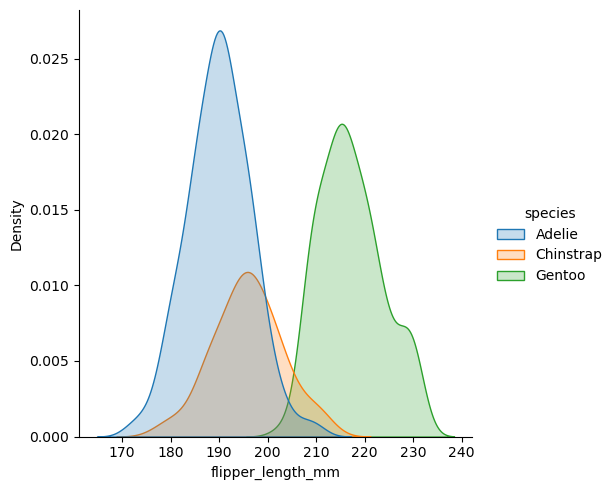

In [12]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

# Kernel density estimation pitfalls

KDE 플롯에는 많은 이점이 있습니다. 데이터의 중요한 특징은 쉽게 식별할 수 있으며(중심 경향, 바이모달, 편향) 하위 집합 간의 비교가 쉽습니다.
KDE가 기본 데이터를 제대로 나타내지 못하는 상황도 있습니다. 이는 KDE의 논리가 기본 배포가 매끄럽고 제한이 없다고 가정하기 때문입니다. 이 가정이 실패할 수 있는 한 가지 방법은 변수가 자연적으로 제한된 양을 반영하는 경우입니다. 경계에 가까운 관측치가 있는 경우(예: 음수가 될 수 없는 작은 변수 값) KDE 곡선이 비현실적인 값으로 확장될 수 있습니다.

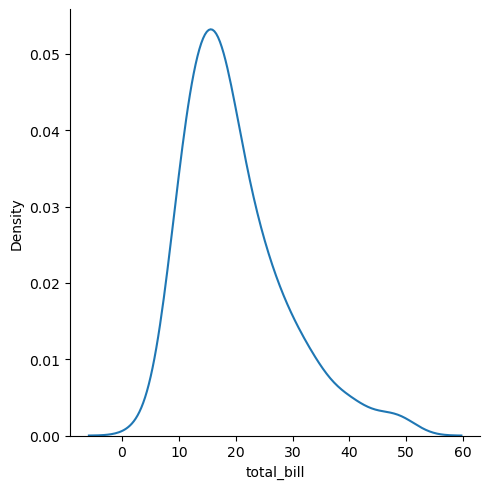

In [15]:
tips = sns.load_dataset('tips')
sns.displot(tips, x="total_bill", kind="kde")


cut이것은 곡선이 극단적인 데이터 포인트를 넘어 확장되어야 하는 정도를 지정하는 매개변수를 사용하여 부분적으로 피할 수 있습니다 . 그러나 이것은 곡선이 그려지는 위치에만 영향을 미칩니다. 밀도 추정치는 데이터가 존재할 수 없는 범위에서 여전히 평활화되어 분포의 극단에서 인위적으로 낮아집니다.

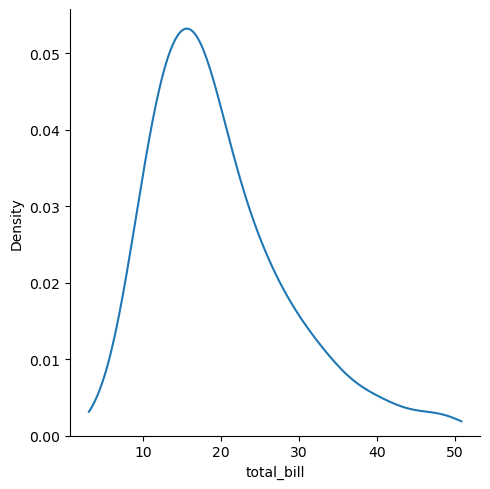

In [22]:
sns.displot(tips, x="total_bill", kind="kde", cut=0)

KDE 접근 방식은 불연속 데이터 또는 데이터가 자연스럽게 연속적이지만 특정 값이 과도하게 표현되는 경우에도 실패합니다. 명심해야 할 중요한 점은 데이터 자체가 매끄럽지 않은 경우에도 KDE는 항상 부드러운 곡선을 표시한다는 것입니다. 예를 들어 다음과 같은 다이아몬드 가중치 분포를 고려하십시오.

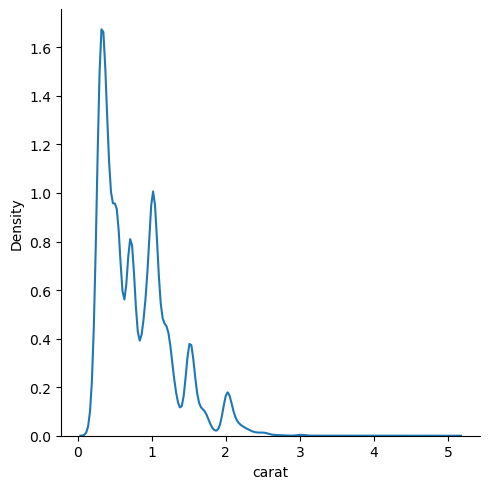

In [23]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

KDE는 특정 값 주변에 피크가 있다고 제안하지만 히스토그램은 훨씬 더 들쭉날쭉한 분포를 나타냅니다.

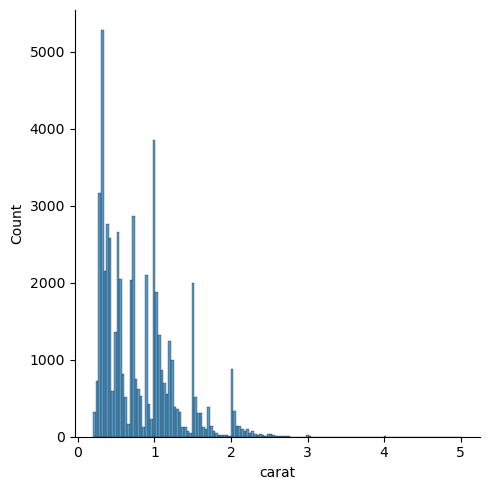

In [24]:
sns.displot(diamonds, x="carat")

절충안으로 이 두 가지 접근 방식을 결합하는 것이 가능합니다. 히스토그램 모드에 있는 동안 displot()( 와 마찬가지로 histplot()) 부드러운 KDE 곡선을 포함하는 옵션이 있습니다 참고 kde=True

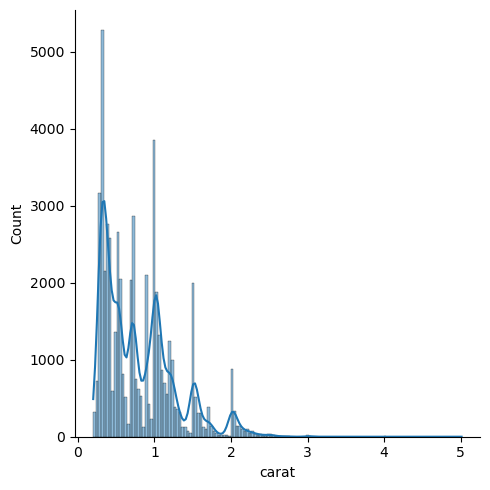

In [26]:
sns.displot(diamonds, x="carat", kde=True)

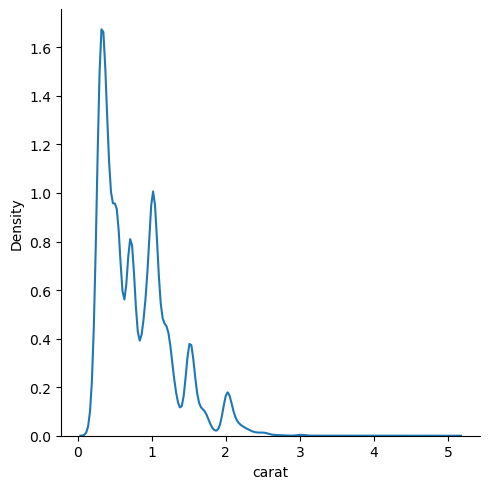

In [27]:
sns.displot(diamonds, x="carat", kind="kde")